# Analyzing COVID-19 Data

The coronavirus disease (COVID-19) originated in 2019 in Wuhan, China. The virus spread across the globe, with the number of cases quickly increasing. The World Health Organization classified the COVID-19 outbreak as a pandemic, causing many countries to implement social distancing measures and shut down non-essential activities. 

[The data used in the analysis is from the European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide).

In [9]:
%matplotlib inline

In [10]:
import pandas                   

In [12]:
df = pandas.read_excel('s3://grimes-ia241/COVID-19-geographic-disbtribution-worldwide_April_10_2020.xlsx')
df[:5]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,2020-04-10,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
1,2020-04-09,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
2,2020-04-08,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
3,2020-04-07,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
4,2020-04-06,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0


## Top 5 Countries with the Highest Case Rate

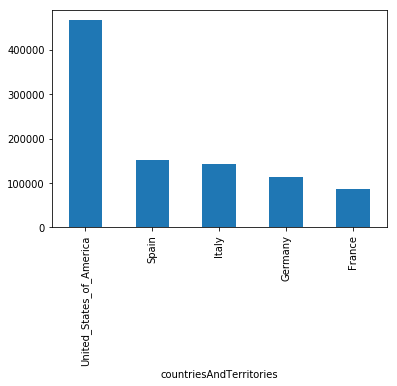

In [24]:
most_cases_worldwide = df.groupby('countriesAndTerritories').sum()['cases']
most_cases_worldwide.nlargest(5).plot.bar()

The bar graph shows the top five countries with the largest total sum of COVID-19 cases. This shows that the United States has the highest rate of cases by a large margin. Also, the other four countries are in Europe, showing that the European continent has a large number of cases overall. 

## Comparing the United States and China: The Relationship Between Cases and Deaths

In [27]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'China')

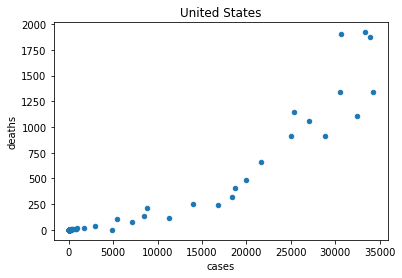

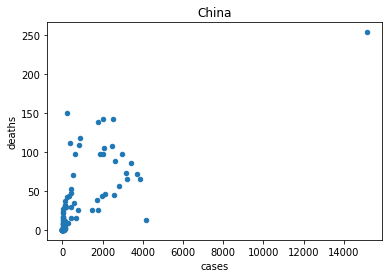

In [29]:
usa_data = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']
china_data = df.loc[df['countriesAndTerritories'] == 'China']

usa_data.plot.scatter(x = 'cases', y = 'deaths')
plt.title("United States")
china_data.plot.scatter(x = 'cases', y = 'deaths')
plt.title("China")

These graphs show the relationship between the rate of cases and the number of deaths in the country. The United States has a clear positive correlation. As the number of cases steadily increase, so does the number of deaths. In China, there are fewer reported cases, and no clear relationship between cases and deaths can be seen, because all the points are mainly clustered in one area of the graph. The number of COVID-19 cases in China does not appear to be increasing as quickly as the United States. 

## Worldwide Deaths Per Day

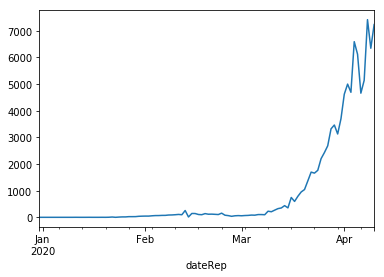

In [31]:
sum_deaths = df.groupby('dateRep').sum()['deaths']
sum_deaths.plot()

This graph shows the rate of deaths per day caused by COVID-19. The plot shows a sharp increase in deaths since mid-March 2020. There was a slight drop in COVID-19 death in the beginning of April, but they quickly spiked back up.

## Conclusions and Limitations

The analysis shows that the number of COVID-19 cases continue to increase worldwide. When there are more cases, there are also more deaths. The United States has the largest number of cases, meaning they likely have the largest number of deaths as well. Possible limitations of the analysis include a time limit on the project, so the data may change in the near future. Additionally, the analysis could benefit from more robust data, such as the age/race/gender demographics of the COVID-19 patients. 